### Importing the modules

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the file

In [4]:
AAPL = pd.read_csv("AAPL.csv")

In [5]:
AAPL.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,122.59,124.85,121.20,121.26,121.26,"16,43,20,000"
1,25-Feb-2021,124.68,126.46,120.54,120.99,120.99,"14,73,06,500"
2,24-Feb-2021,124.94,125.56,122.23,125.35,125.35,"11,06,91,500"
3,23-Feb-2021,123.76,126.71,118.39,125.86,125.86,"15,78,59,100"
4,22-Feb-2021,128.01,129.72,125.60,126.00,126.00,"10,36,07,600"


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9800 non-null   object 
 1   Open        9800 non-null   object 
 2   High        9725 non-null   float64
 3   Low         9725 non-null   float64
 4   Close       9725 non-null   float64
 5   Adj. Close  9725 non-null   float64
 6   Volume      9725 non-null   object 
dtypes: float64(4), object(3)
memory usage: 536.1+ KB


### Cleaning the dataset

In [7]:
# Drop NULL rows
AAPL.dropna(inplace = True)

In [9]:
# Change Dtype of Columns
AAPL["Date"] = pd.to_datetime(AAPL["Date"])
AAPL["Volume"] = AAPL["Volume"].str.replace(',', '')
AAPL = AAPL.astype({"Open": float, "Volume": float})

In [10]:
# Sort the Database by Date
AAPL = AAPL.sort_values(by = 'Date', ignore_index = True)

In [11]:
# Drop rows having Date < '2015-01-01'
AAPL = AAPL[AAPL["Date"] >= '2015-01-01'].reset_index(drop = True)

In [12]:
AAPL.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,50.160265,50.700723,49.618696,50.182447,48.781143,1.449887e+08
std,28.029971,28.433917,27.552589,28.007536,28.560715,7.095025e+07
min,22.500000,22.920000,22.370000,22.580000,21.130000,4.544800e+07
25%,30.000000,30.130000,29.810000,29.990000,27.910000,9.667000e+07
50%,42.020000,42.550000,41.630000,42.100000,40.600000,1.272076e+08
75%,55.100000,55.710000,54.370000,55.170000,53.980000,1.731832e+08
max,143.600000,145.090000,141.370000,143.160000,142.950000,6.488252e+08


### EDA

Text(0, 0.5, 'Adj. Close')

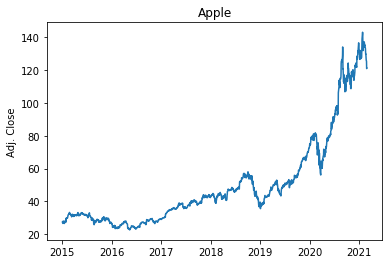

In [15]:
plt.plot(AAPL["Date"], AAPL["Close"])
plt.title("Apple Closing Price")
plt.ylabel('Adj. Close')

Text(0, 0.5, 'Volume')

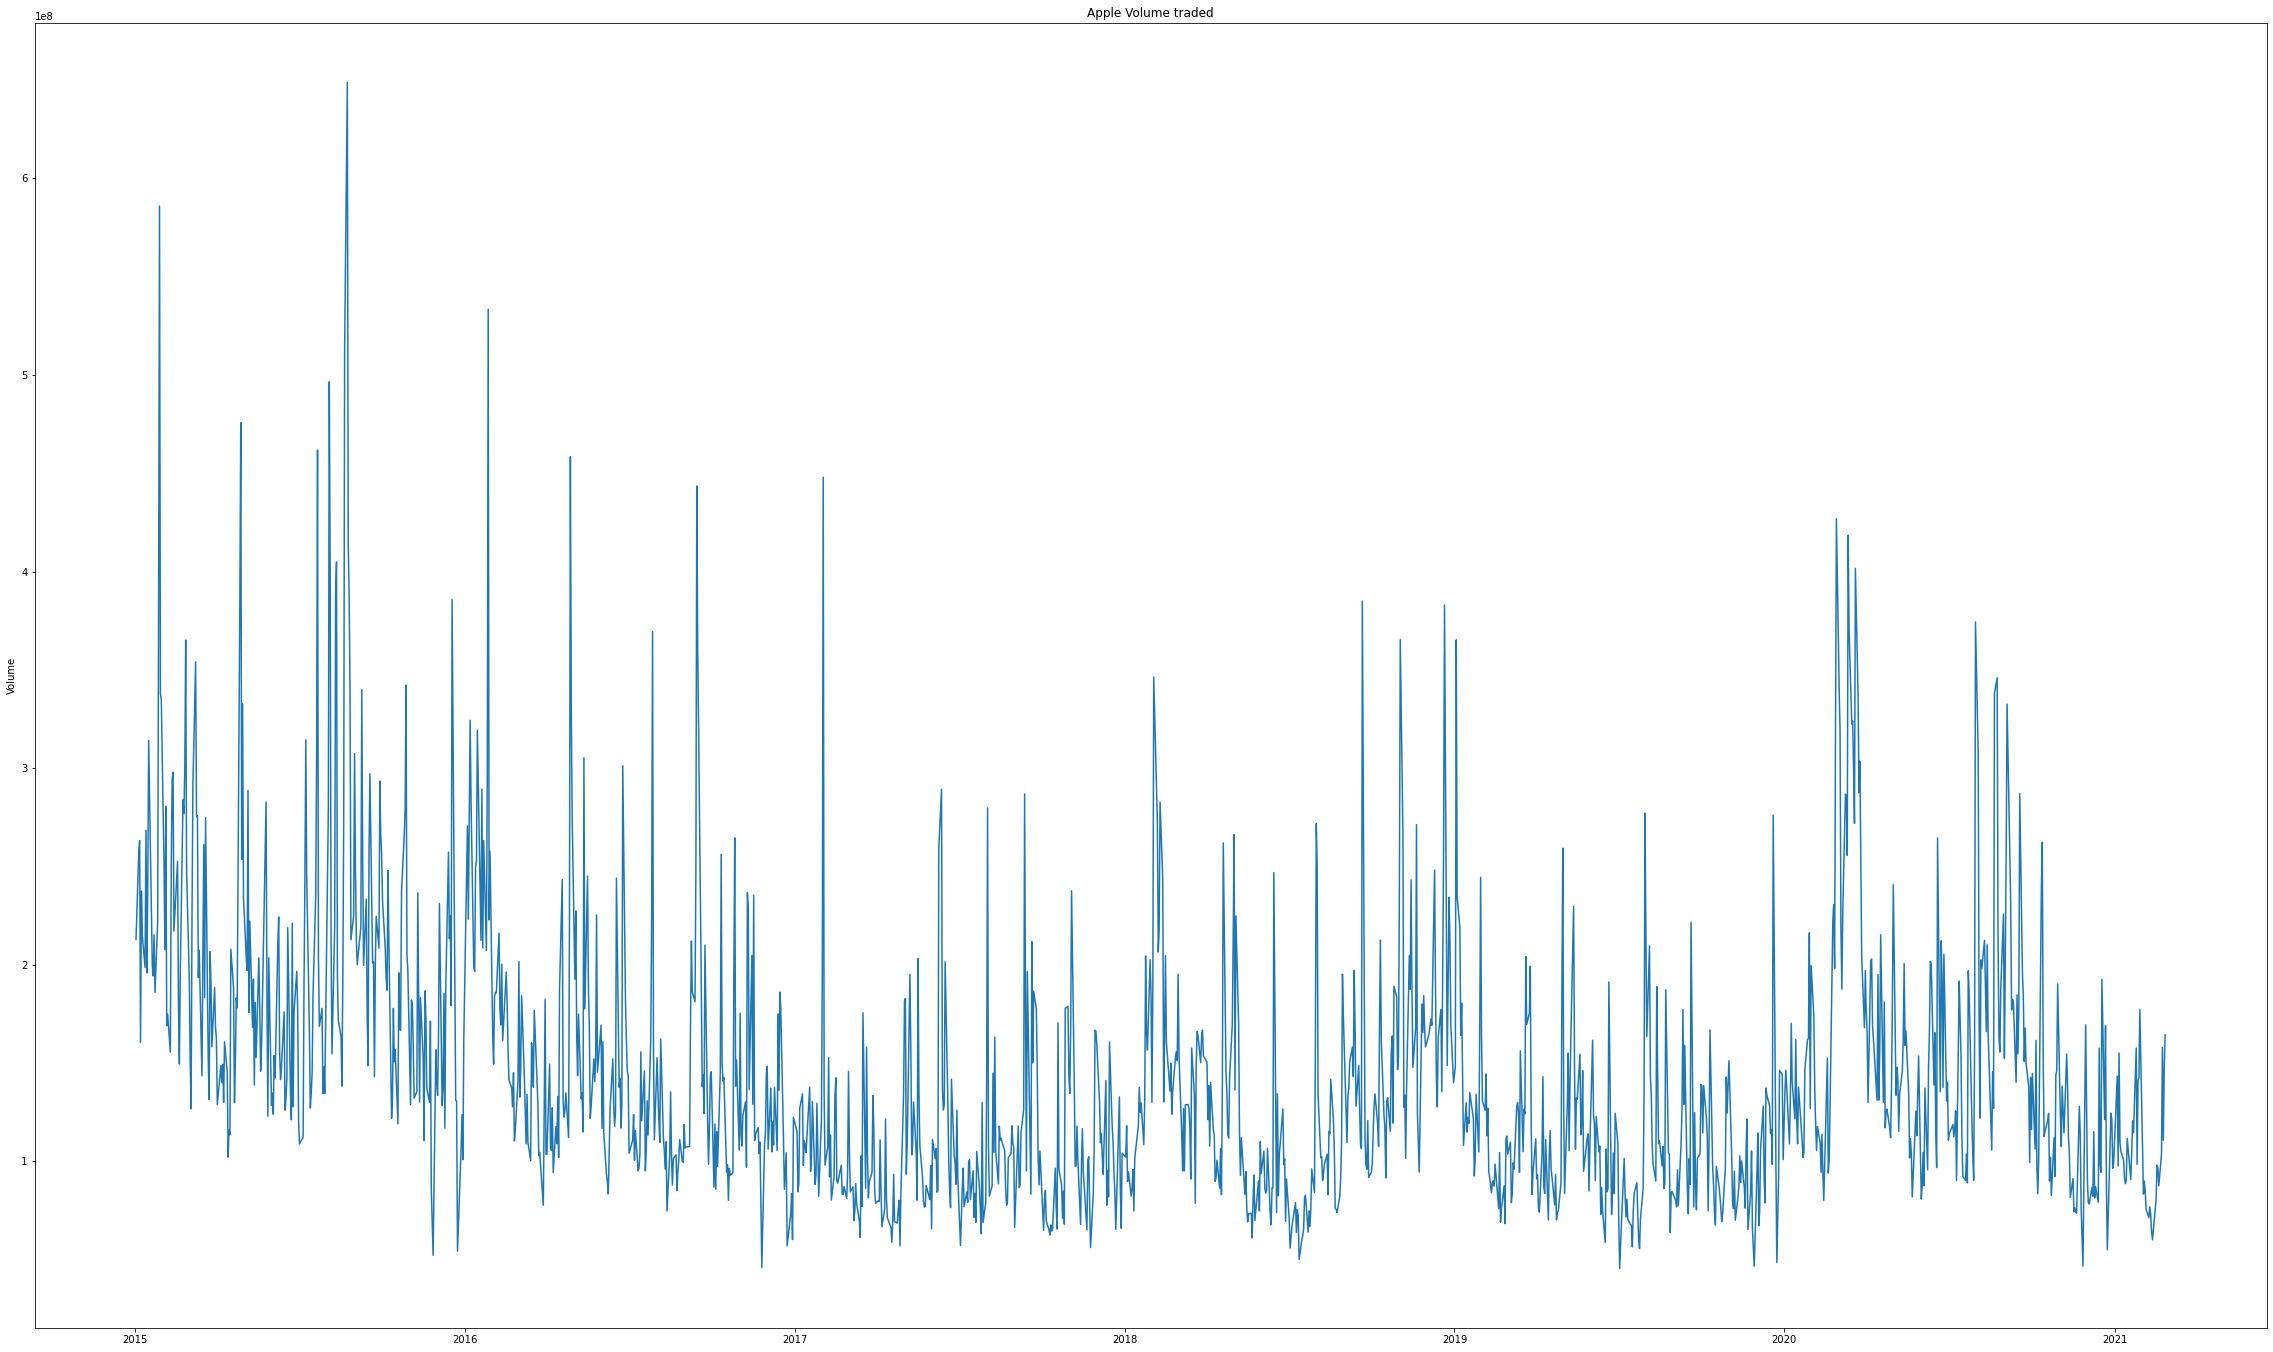

In [18]:
plt.figure(figsize=(40, 24))
plt.plot(AAPL["Date"], AAPL["Volume"])
plt.title('Apple Volume traded')
plt.ylabel('Volume')

In [19]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
    column_name = f'Moving Average for {Moving_Average} days'
    AAPL[column_name] = AAPL["Close"].rolling(Moving_Average).mean()

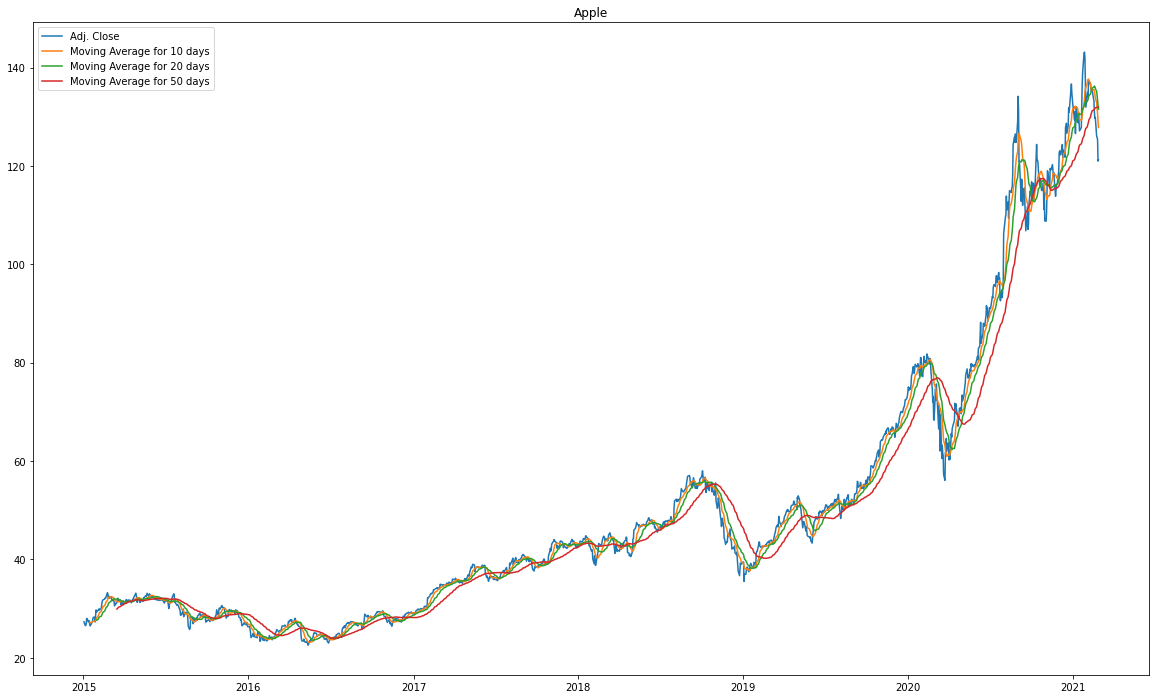

In [22]:
plt.figure(figsize=(20, 12))
plt.plot(AAPL["Date"], AAPL["Close"])
plt.plot(AAPL["Date"], AAPL["Moving Average for 10 days"])
plt.plot(AAPL["Date"], AAPL["Moving Average for 20 days"])
plt.plot(AAPL["Date"], AAPL["Moving Average for 50 days"])
plt.title('Apple')
plt.legend(("Adj. Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))



#Rolling Average smooth out the short term changes in data to define the larger ups and downs

### Defining daily returns
#### pct_change defines the average between and previous value

In [25]:
AAPL["Daily Return"] = AAPL["Close"].pct_change()

Text(0, 0.5, 'Daily Return')

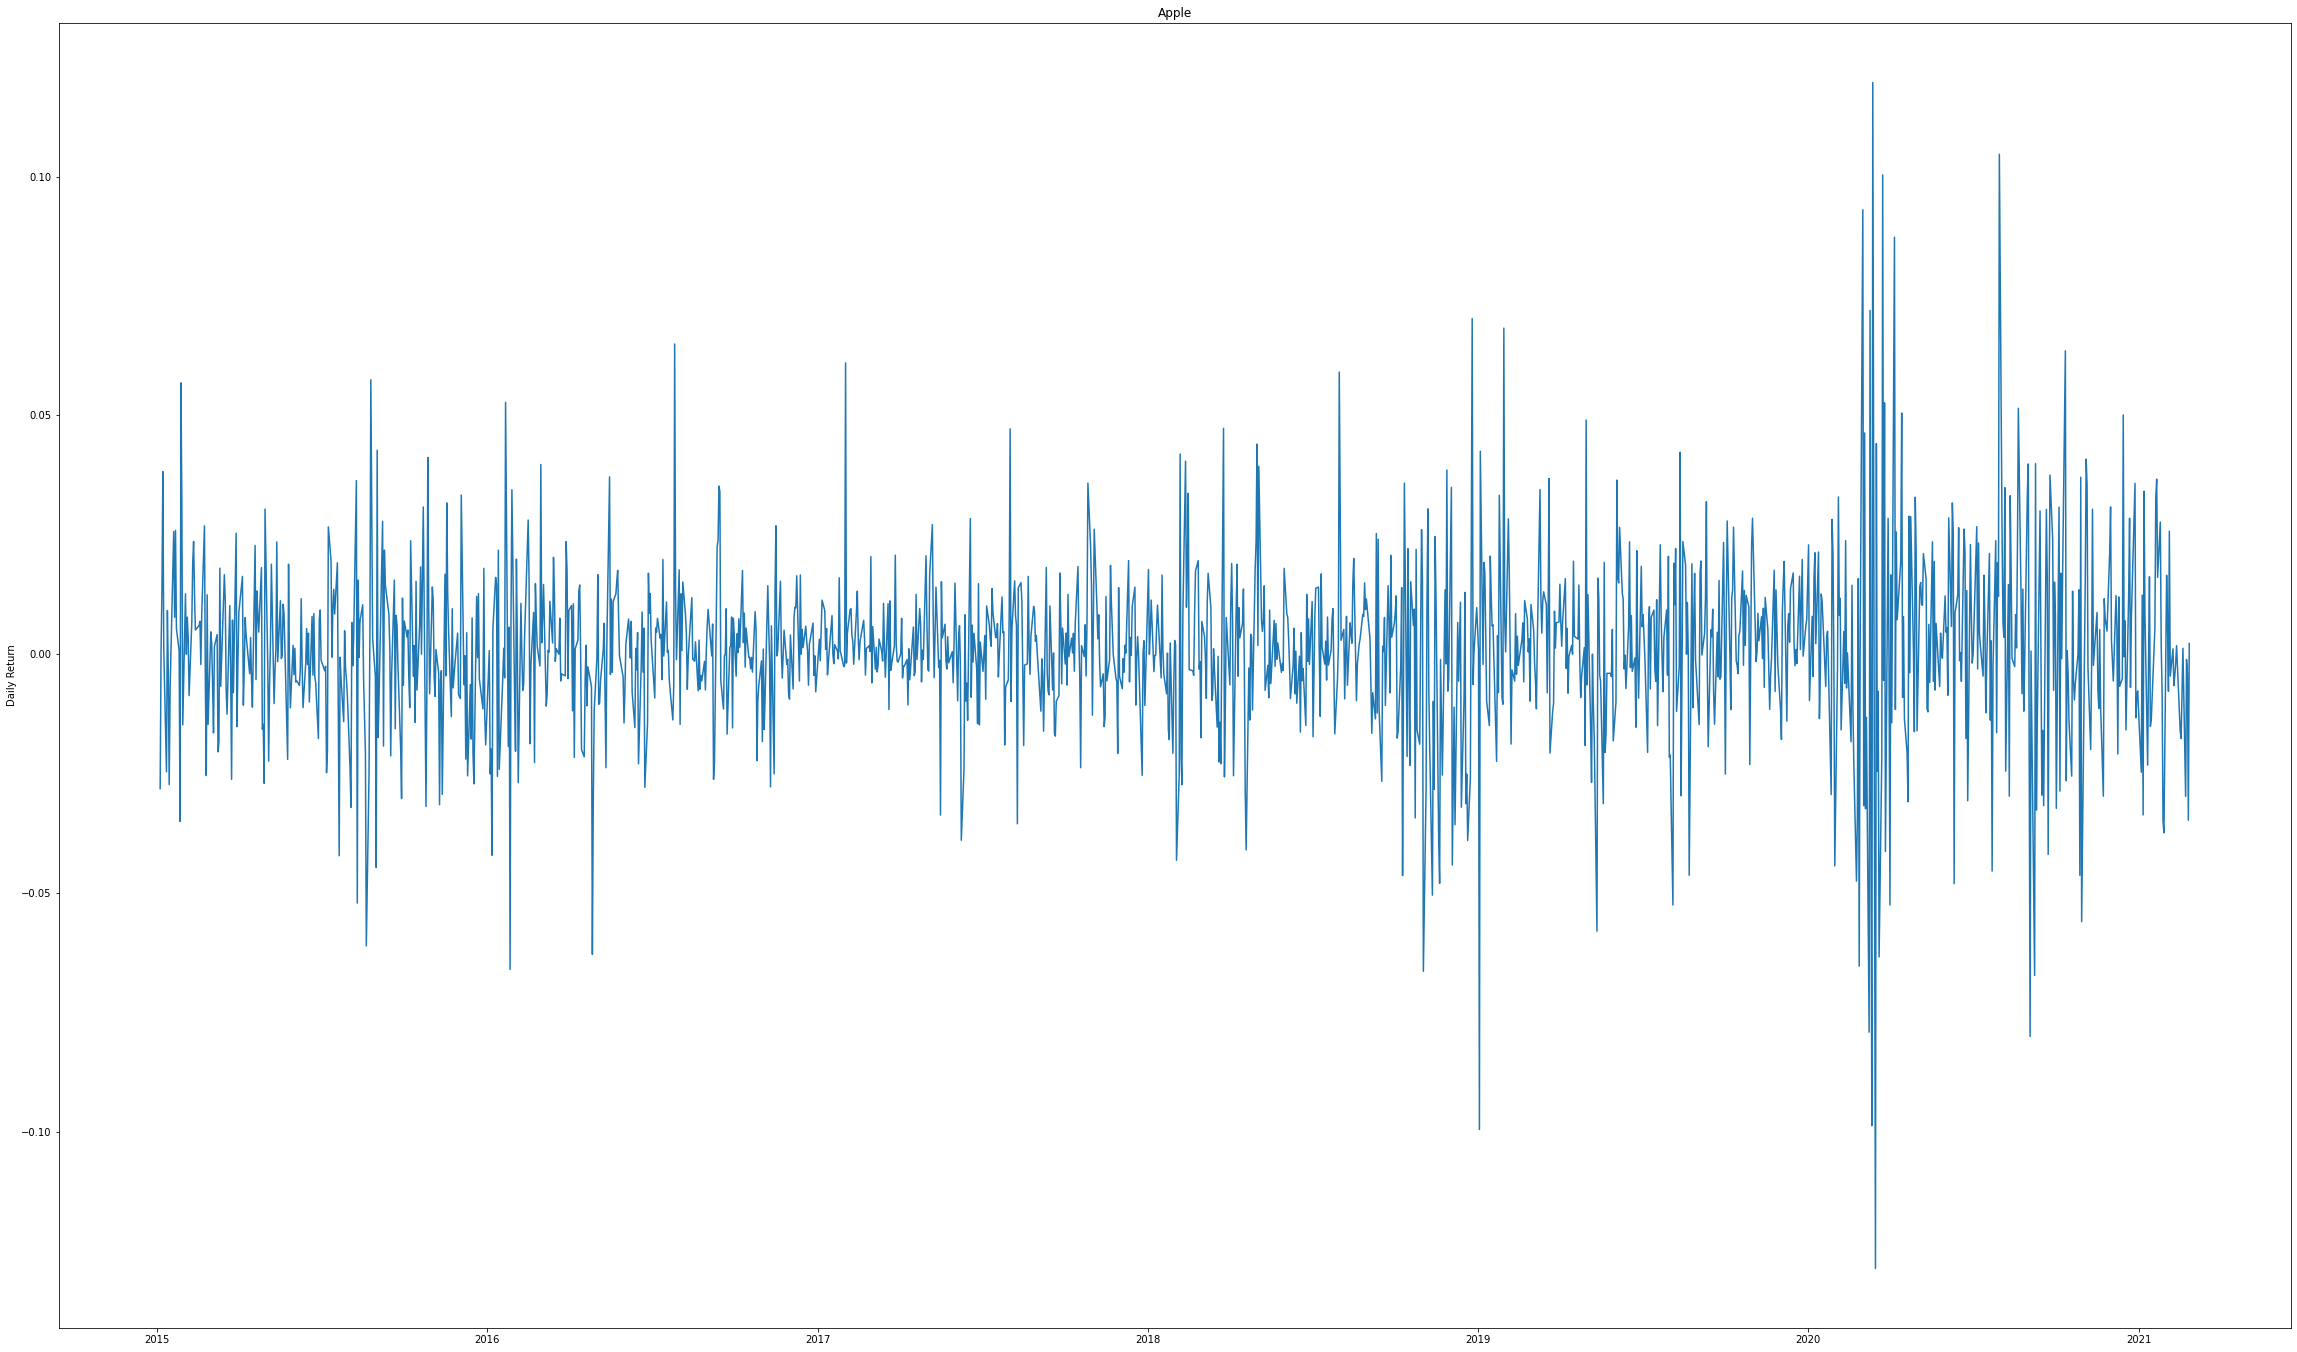

In [27]:
plt.figure(figsize=(40, 24))
plt.plot(AAPL["Date"], AAPL["Daily Return"])
plt.title("Apple")
plt.ylabel('Daily Return')

Text(0.5, 1.0, 'Apple')

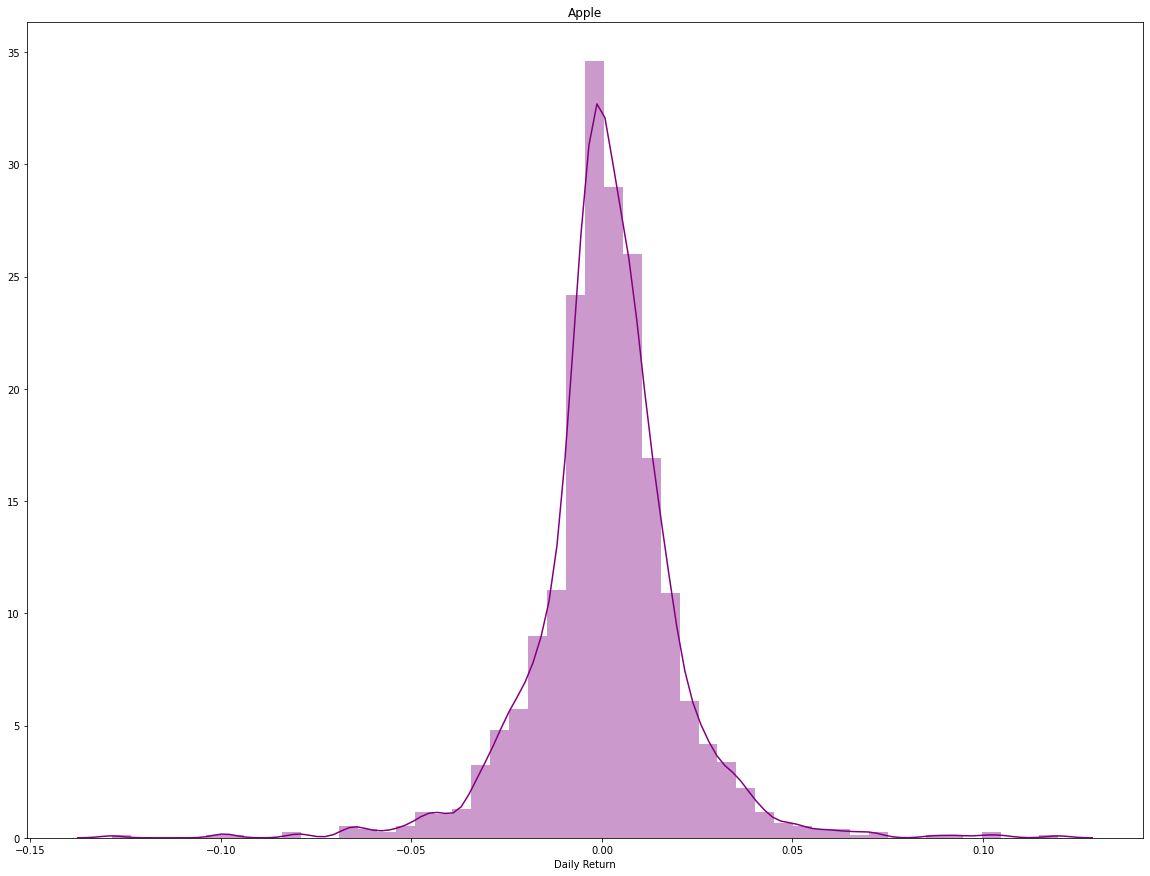

In [29]:
plt.figure(figsize=(20, 15))
sns.distplot(AAPL["Daily Return"].dropna(), color = "purple")
plt.title("Apple")

In [37]:
print("Kurtosis Value")
print(f'Apple: {AAPL["Daily Return"].kurtosis()}')

Kurtosis Value
Apple: 6.378443539176545


In [39]:
# Company_return contain closing price of all the companies
Company_returns = pd.DataFrame()
Company_returns["AAPL"] = AAPL["Close"]

In [40]:
# Companies_Daily_returns contains percentage daily returns of all the companies
Company_Daily_returns = Companies_returns.pct_change()
Company_Daily_returns.head()

,AAPL
0,NaN
1,-0.028174
2,0.000377
3,0.013925
4,0.038233


Text(10, 0, 'Apple')

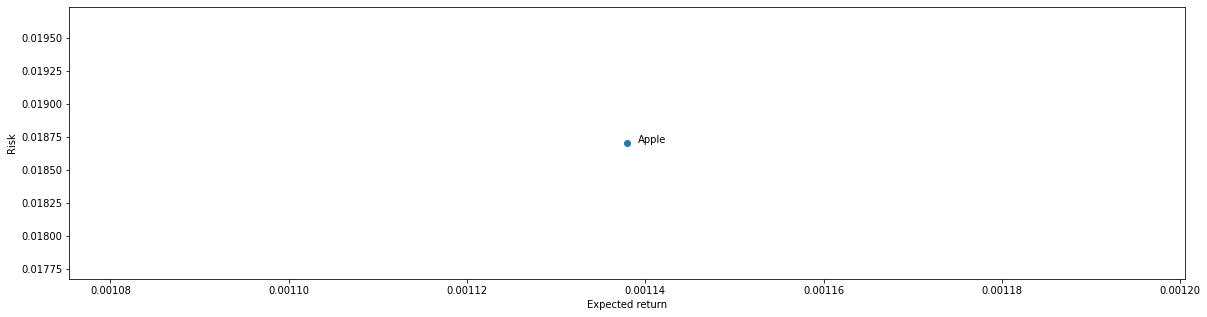

In [43]:
Returns = Company_Daily_returns.dropna()

plt.figure(figsize=(20, 5))
plt.scatter(Returns.mean(), Returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')
x,y=Returns.mean(), Returns.std()
plt.annotate("Apple", xy = (x, y), xytext = (10, 0), textcoords = 'offset points')